### Import that Pandas package.  We will use to hold the results of the queries, print Pandas tables, and print simple data visualizations.

In [1]:
import pandas as pd


### In the next cell, we run a bq using the bang to shell out to linux

In [2]:
! bq query --use_legacy_sql=FALSE 'SELECT start_station_name, end_station_name, count(*) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5'

Waiting on bqjob_racb2c3ce524e27a_00000179caa00c71_1 ... (0s) Current status: DONE   
+-----------------------------------------+--------------------------------------+-----------+
|           start_station_name            |           end_station_name           | trip_freq |
+-----------------------------------------+--------------------------------------+-----------+
| Harry Bridges Plaza (Ferry Building)    | Embarcadero at Sansome               |      9150 |
| San Francisco Caltrain 2 (330 Townsend) | Townsend at 7th                      |      8508 |
| 2nd at Townsend                         | Harry Bridges Plaza (Ferry Building) |      7620 |
| Harry Bridges Plaza (Ferry Building)    | 2nd at Townsend                      |      6888 |
| Embarcadero at Sansome                  | Steuart at Market                    |      6874 |
+-----------------------------------------+--------------------------------------+-----------+


### In the next cell, we add the command line options:

--format=csv which formats it into comma separated value

\> result.csv which writes the output to a file

this allows us to read the file back into pandas

If you have more than 100 rows, you may want to use the max_rows parameter like this:

--max_rows=1000000

In [3]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT start_station_name, end_station_name, count(*) as trip_freq FROM `bigquery-public-data.san_francisco.bikeshare_trips` GROUP BY start_station_name, end_station_name ORDER BY trip_freq DESC LIMIT 5' > result.csv

Waiting on bqjob_r7a62677ffc3ca3bc_00000179caa03917_1 ... (0s) Current status: DONE   


### Read the data from the file into Pandas and create a simple data visualization

In [4]:
pop_trips = pd.read_csv('result.csv')

In [5]:
pop_trips

,start_station_name,end_station_name,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874


<AxesSubplot:>

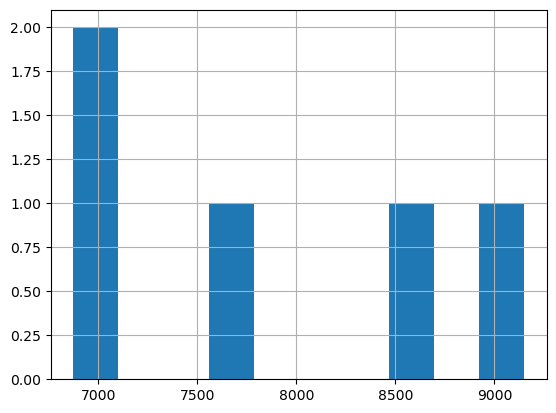

In [6]:
pop_trips.trip_freq.hist()

### We can also use the magic commands to run  BigQuery SQL


#### This runs the query above and prints to the notebook output

In [8]:
%%bigquery

SELECT start_station_name, end_station_name, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY start_station_name, end_station_name 
ORDER BY trip_freq DESC LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.24rows/s]


,start_station_name,end_station_name,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874


#### This next magic command saves it into a Pandas data frame

In [9]:
%%bigquery my_panda_data_frame

SELECT start_station_name, end_station_name, count(*) as trip_freq 
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY start_station_name, end_station_name 
ORDER BY trip_freq DESC LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.79rows/s]


In [10]:
my_panda_data_frame

,start_station_name,end_station_name,trip_freq
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6888
4,Embarcadero at Sansome,Steuart at Market,6874


<AxesSubplot:>

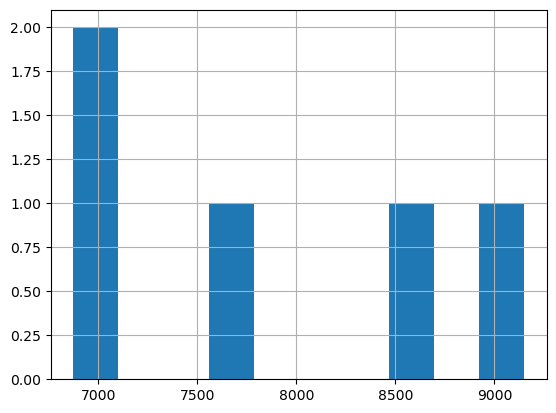

In [11]:
my_panda_data_frame.trip_freq.hist()

In [1]:
%%bigquery commuter_trips_temp

WITH base_tbl_tripsByWeekday AS (
    SELECT
    *, EXTRACT(DAYOFWEEK FROM start_date) as DOW, EXTRACT(HOUR FROM start_date) as starting_hour, EXTRACT(HOUR FROM end_date) as ending_hour
    FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
    WHERE EXTRACT(DAYOFWEEK FROM start_date) BETWEEN 2 AND 6
)
SELECT start_station_name, end_station_name, count(distinct trip_id) as num_trips, avg(starting_hour) as average_starting_hour
FROM base_tbl_tripsByWeekday
WHERE (starting_hour BETWEEN 6 AND 9) OR (starting_hour BETWEEN 16 AND 19)
group by start_station_name, end_station_name 
order by (num_trips) DESC
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.81rows/s]


In [4]:
commuter_trips_temp.describe()

,num_trips,average_starting_hour
count,5.000000,5.000000
mean,5370.600000,12.505422
std,269.735611,2.647674
min,5087.000000,9.184329
25%,5164.000000,11.155888
50%,5322.000000,11.764849
75%,5539.000000,15.190550
max,5741.000000,15.231492
